In [3]:
# imports for the dataset and building our neural network
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
#from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
len(X_train)

50000

In [6]:
len(X_test)

10000

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
X_train[0].shape

(32, 32, 3)

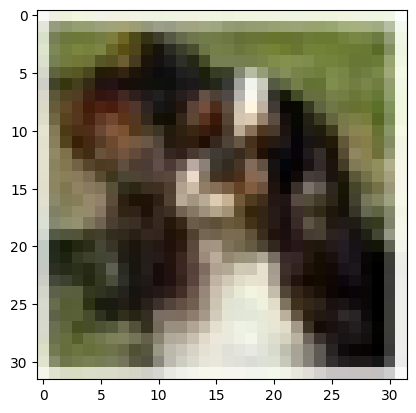

In [13]:
plt.imshow(X_train[500]) #RGB---BGR

In [14]:
y_train[0]

array([6], dtype=uint8)

C:\Users\nilay\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


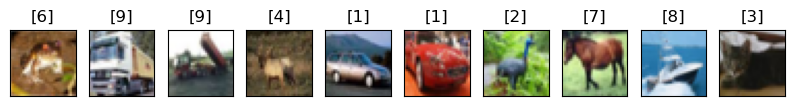

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

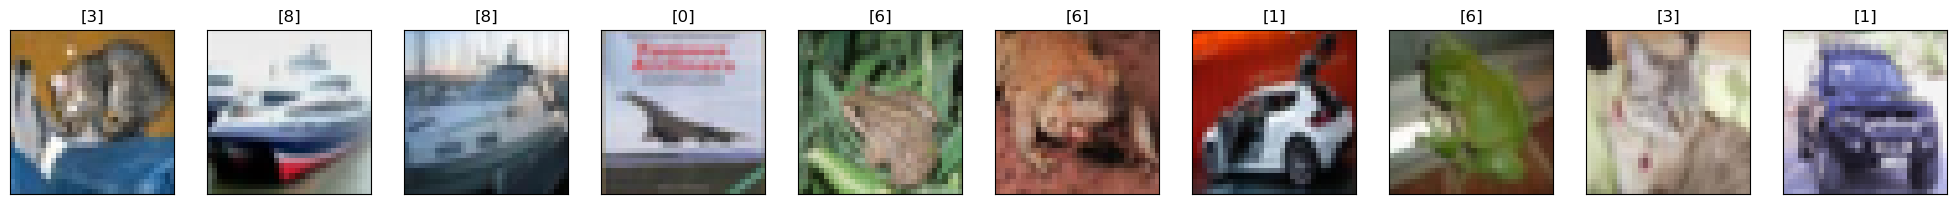

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(25, 12))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (10).

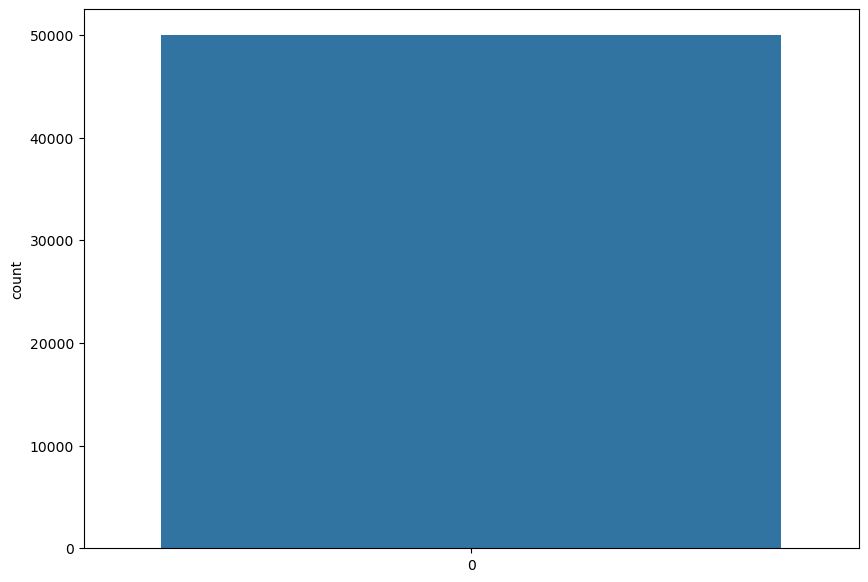

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [34]:
print(X_train.shape)
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape[3])

(50000, 32, 32, 3)
50000
32
32
3


In [16]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train.shape[0]

50000

In [17]:
X_train[0].dtype

dtype('uint8')

In [18]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


In [19]:
# normalizing the data to help with the training
X_train =X_train/ 255
X_test =X_test/ 255

In [20]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [21]:

# convolutional layer 1
conv_1=Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3))
model.add(conv_1)
#n=32, f=3, no. of fliters=32, ouput = 32 * 32 * 32

In [22]:
#task: add more covolution layers and train the model

# convolutional layer 2
conv2=Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')
model.add(conv2)
#n=32, f=3, no.of filters=64, n-f+1=32-3+1= 30, output= 30*30*64
# max pool layer
mp2=MaxPool2D(pool_size=(2,2))
model.add(mp2)


In [23]:
"""
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
"""

"\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))\nmodel.add(MaxPool2D(pool_size=(2,2)))\n"

In [24]:
# flatten output of conv
model.add(Flatten())

In [25]:
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 100)               1440100   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                        

In [27]:
# compiling the sequential model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 17s 13ms/step - loss: 1.4415 - accuracy: 0.4786 - val_loss: 1.1906 - val_accuracy: 0.5702
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0520 - accuracy: 0.6301 - val_loss: 0.9788 - val_accuracy: 0.6593
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 0.8848 - accuracy: 0.6910 - val_loss: 0.9370 - val_accuracy: 0.6749
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 0.7683 - accuracy: 0.7324 - val_loss: 0.9340 - val_accuracy: 0.6714
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6656 - accuracy: 0.7699 - val_loss: 0.9227 - val_accuracy: 0.6862
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.5611 - accuracy: 0.8060 - val_loss: 0.9261 - val_accuracy: 0.6892
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.4732 - accuracy: 0.8354 - val_loss: 0.9874 - val_accuracy: 0.682

In [ ]:
model.history.history

{'loss': [1.7141858339309692,
  1.290534257888794,
  1.1549263000488281,
  1.065773844718933,
  0.9947389960289001,
  0.9110465049743652,
  0.8421573638916016,
  0.7742999196052551,
  0.7046595215797424,
  0.6423268914222717],
 'accuracy': [0.3982200026512146,
  0.5437600016593933,
  0.5952200293540955,
  0.6266800165176392,
  0.652400016784668,
  0.6816800236701965,
  0.7031800150871277,
  0.7308400273323059,
  0.7539399862289429,
  0.777180016040802],
 'val_loss': [1.3930344581604004,
  1.2629170417785645,
  1.1952006816864014,
  1.1863104104995728,
  1.1562738418579102,
  1.1479785442352295,
  1.1931557655334473,
  1.1593637466430664,
  1.134281873703003,
  1.1902285814285278],
 'val_accuracy': [0.5023000240325928,
  0.551800012588501,
  0.578000009059906,
  0.5795999765396118,
  0.5985000133514404,
  0.6046000123023987,
  0.592199981212616,
  0.6093999743461609,
  0.6157000064849854,
  0.6187000274658203]}

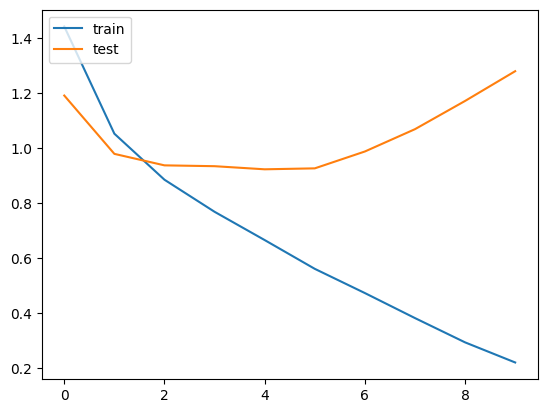

In [28]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

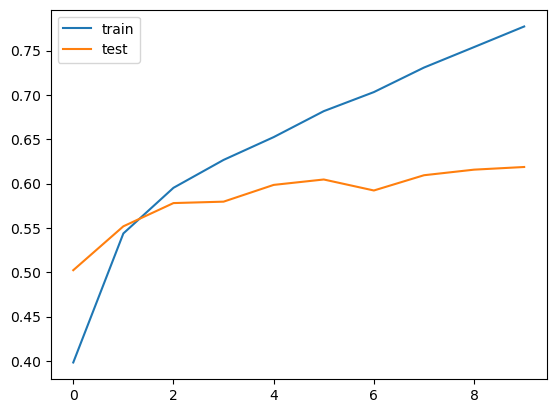

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
import numpy as np
import tensorflow as tf
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)

# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred_classes)
confusion_mtx

313/313 [==============================] - 2s 6ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[692,  41,  62,  40,  14,   3,   8,  13,  93,  34],
       [ 28, 794,  11,  18,   4,   4,   8,   6,  38,  89],
       [ 79,  10, 474, 116, 127,  62,  63,  44,  14,  11],
       [ 25,  24,  79, 551,  55, 125,  75,  33,  16,  17],
       [ 36,  13, 105, 109, 558,  31,  66,  66,  12,   4],
       [ 20,  15,  76, 306,  46, 440,  30,  50,  10,   7],
       [  9,  26,  57,  93,  65,  26, 690,  12,   8,  14],
       [ 22,  15,  59,  87,  62,  61,  11, 652,   5,  26],
       [ 97,  82,  17,  26,   9,  11,   5,   3, 719,  31],
       [ 41, 183,  13,  39,   9,   5,  14,  25,  54, 617]])>